Sources: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/
https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb

In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib.request
import bs4 #this is beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

Read the User Data

In [2]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Read the Ratings

In [3]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Read the Movies

In [4]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [5]:
print(movies.dtypes)
print(movies.describe())

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object
          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting Data

In [25]:
print(users.head())
print(users['occupation'].head())

columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())

print(users.iloc[3])


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object
   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering Data

In [26]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [51]:
forty = users[users.age == 40]
fortyMales = forty[forty.sex == "M"]
fortyMales.head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


In [53]:
users[(users.age == 40) & (users.sex == "M")].head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


In [57]:
female = users[users.sex == "F"]
femaleProg = female[female.occupation == "programmer"]
print(femaleProg.describe())
print(femaleProg.age.mean())
print(femaleProg['age'].mean())

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
32.166666666666664
32.166666666666664


Split Data by UserID

In [41]:
print(ratings.head())

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


In [6]:
grouped_data = ratings.groupby('user_id')

ratings_per_user = grouped_data.count()
ratings_per_user.head()

,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


In [7]:
grouped_movies = ratings['rating'].groupby(ratings['movie_id'])
average_ratings = grouped_movies.mean()
print("Average ratings:")
print(average_ratings.head())

Average ratings:
movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64


(array([  77.,   31.,  105.,  182.,  233.,  420.,  335.,  245.,   43.,   11.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

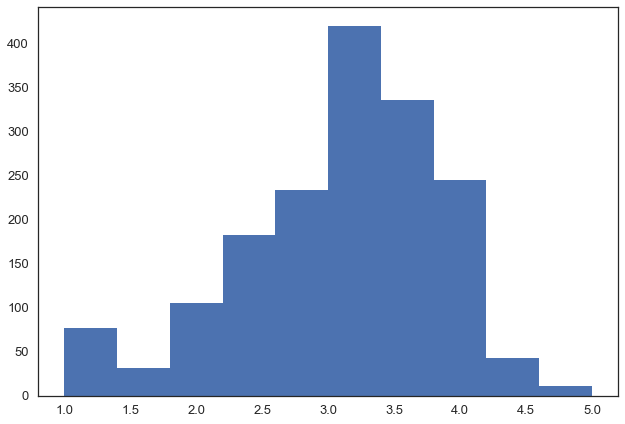

In [8]:
plt.hist(average_ratings)

In [10]:
maximum_rating = average_ratings.max()
minimum_rating = average_ratings.min()
print(maximum_rating, minimum_rating)

5.0 1.0


In [67]:
good_movie_ids = average_ratings[average_ratings == maximum_rating].index
print(good_movie_ids)

Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name='movie_id')


In [70]:
print(movies[movies.movie_id.isin(good_movie_ids)].title)

813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object


In [77]:
print(average_ratings[average_ratings == maximum_rating])

movie_id
814     5.0
1122    5.0
1189    5.0
1201    5.0
1293    5.0
1467    5.0
1500    5.0
1536    5.0
1599    5.0
1653    5.0
Name: rating, dtype: float64


In [81]:
print(movies[movies.movie_id==814].title)

813    Great Day in Harlem, A (1994)
Name: title, dtype: object


In [11]:
how_many_ratings = grouped_movies.count()
max_ratings = how_many_ratings.max()
print("Most ratings")
print(max_ratings)
print("Number of ratings per Top movie")
print(how_many_ratings[average_ratings == maximum_rating])

Most ratings
583
Number of ratings per Top movie
movie_id
814     1
1122    1
1189    3
1201    1
1293    3
1467    2
1500    2
1536    1
1599    1
1653    1
Name: rating, dtype: int64


(array([  1.14600000e+03,   2.49000000e+02,   1.39000000e+02,
          6.70000000e+01,   3.80000000e+01,   2.40000000e+01,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.2,  117.4,  175.6,  233.8,  292. ,  350.2,  408.4,
         466.6,  524.8,  583. ]),
 <a list of 10 Patch objects>)

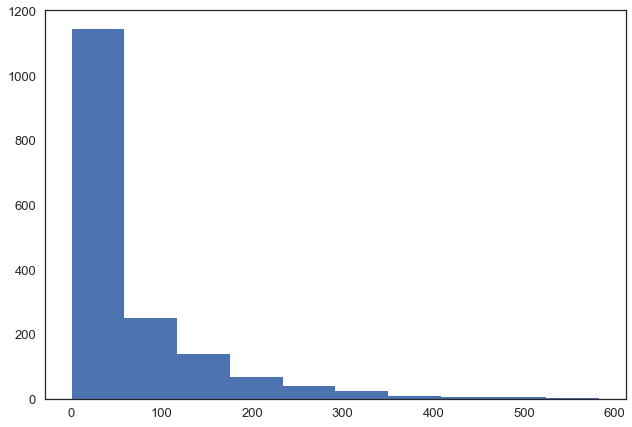

In [12]:
plt.hist(how_many_ratings)

In [113]:
average_ratings.head()

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

In [119]:
grouped_occu = users['sex'].groupby(users['occupation'])
male_dominant_occupations = grouped_occu.apply(lambda f: 
                                               sum(f == 'M') > sum(f == 'F'))
print(male_dominant_occupations)

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool


In [120]:
print("Number of male users:")
print(sum(users['sex'] == 'M'))
print("Number of female users:")
print(sum(users['sex'] == 'F'))

Number of male users:
670
Number of female users:
273
